
<div class="alert alert-info" role="alert">
  <p>
    <center><b>Usage Guidelines</b></center>
  </p>

  <p>
    This lesson is part of the <b>DS Lab core curriculum</b>. For that reason, this notebook can only be used on your WQU virtual machine.
  </p>

  <p>
    This means:
    <ul>
      <li><span style="color: red">ⓧ</span> No downloading this notebook.</li>
      <li><span style="color: red">ⓧ</span> No re-sharing of this notebook with friends or colleagues.</li>
      <li><span style="color: red">ⓧ</span> No downloading the embedded videos in this notebook.</li>
      <li><span style="color: red">ⓧ</span> No re-sharing embedded videos with friends or colleagues.</li>
      <li><span style="color: red">ⓧ</span> No adding this notebook to public or private repositories.</li>
      <li><span style="color: red">ⓧ</span> No uploading this notebook (or screenshots of it) to other websites, including websites for study resources.</li>
    </ul>

  </p>
</div>


<font size="+3"><strong>1.3. Exploratory Data Analysis </strong></font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from IPython.display import VimeoVideo

In [2]:
VimeoVideo("656355010", h="3cc6a34eba", width=600)

After importing, the next step in many data science projects is exploratory data analysis (EDA), where you get a feel for your data by summarizing its main characteristics using descriptive statistics and data visualization. A good way to plan your EDA is by looking each column and asking yourself questions what it says about your dataset.

<span style='color: transparent; font-size:1%'>WQU WorldQuant University Applied Data Science Lab QQQQ</span>

# Import Data

In [3]:
VimeoVideo("656354357", h="8d99bdbfcd", width=600)

**Task 1.3.1:** Read the CSV file that you created in the last notebook (`"../small-data/mexico-real-estate-clean.csv"`) into a DataFrame named `df`. Be sure to check that all your columns are the correct data type before you go to the next task.

- [What's a DataFrame?](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)
- [What's a CSV file?](../%40textbook/03-pandas-getting-started.ipynb#CSV-Files)
- [Read a CSV file into a DataFrame using pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)

In [2]:
# Import "data/mexico-real-estate-clean.csv"
df = pd.read_csv('data/mehicoooo-real-estate-clean.csv')
# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (34395, 7)


,property_type,region,area_m2,price_usd,state,lat,lon
0,apartment,Northeast,110.0,187230.85,NaN,NaN,NaN
1,apartment,Northeast,65.0,81133.37,NaN,NaN,NaN
2,house,Northeast,211.0,154465.45,NaN,NaN,NaN
3,apartment,Northeast,99.0,146013.2,NaN,NaN,NaN
4,apartment,Northeast,55.0,101416.71,NaN,NaN,NaN


In [3]:
# df.info()
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22844 entries, 11551 to 34394
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  22844 non-null  object 
 1   region         22844 non-null  object 
 2   area_m2        22844 non-null  float64
 3   price_usd      22844 non-null  object 
 4   state          22844 non-null  object 
 5   lat            22844 non-null  float64
 6   lon            22844 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.4+ MB


In [4]:
# Kiểm tra các giá trị không hợp lệ
print(df['price_usd'].unique())

# Loại bỏ các giá trị không phải số
# df['price_usd'] = pd.to_numeric(df['price_usd'], errors='coerce')

# Thay thế NaN nếu cần
# df['price_usd'] = df['price_usd'].fillna(0)  # hoặc một giá trị phù hợp khác

['21801.21' '44653.08' '15759.91' ... '$136,224.17' '$155,752.04'
 '$314,245.81']


In [4]:
df['price_usd'] = df['price_usd'].str.replace("$", "").str.replace(",", "").astype(float)
df

/tmp/ipykernel_157/3040102102.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price_usd'] = df['price_usd'].str.replace("$", "").str.replace(",", "").astype(float)


,property_type,region,area_m2,price_usd,state,lat,lon
11551,apartment,Northeast,72.0,21801.21,Pernambuco,-8.134204,-34.906326
11552,apartment,Northeast,136.0,44653.08,Pernambuco,-8.126664,-34.903924
11553,apartment,Northeast,75.0,15759.91,Pernambuco,-8.125550,-34.907601
11554,apartment,Northeast,187.0,44653.08,Pernambuco,-8.120249,-34.895920
11555,apartment,Northeast,80.0,24427.86,Pernambuco,-8.142666,-34.906906
...,...,...,...,...,...,...,...
34390,apartment,Northeast,74.0,134182.11,Pernambuco,-8.044497,-34.909519
34391,apartment,Northeast,91.0,174748.79,Pernambuco,-8.056418,-34.909309
34392,apartment,Northeast,115.0,115459.02,Pernambuco,-8.137348,-34.909181
34393,apartment,Northeast,76.0,137302.62,Pernambuco,-8.113672,-34.896252


While there are astypewo `dtypes` in our DataFrame (`object` and `float64`), there are three categories of  data: location, categorical, and numeric. Each of these require a different kind of exploration in our analysis. 


# Location Data: `"lat"` and `"lon"`

They say that the most important thing in real estate is location, and we can see where where in Mexico our houses are located by using the `"lat"` and `"lon"` columns. Since latitude and longitude are based on a coordinate system, a good way to visualize them is to create a scatter plot on top of a map. A great tool for this is the [`scatter_mapbox`](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html) from the plotly library.

In [5]:
VimeoVideo("656353826", h="236e9c5d43", width=600)

In [11]:
df.shape

(22844, 7)

**Task 1.3.2:** Add `"lat"` and `"lon"` to the code below, and run the code. You'll see a map that's centered on Mexico City, and you can use the "Zoom Out" button in the upper-right corner of the map so that you can see the whole country. 

- [What's location data?](../%40textbook/05-pandas-summary-statistics.ipynb#Location-Data)
- [What's a scatter plot?](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)

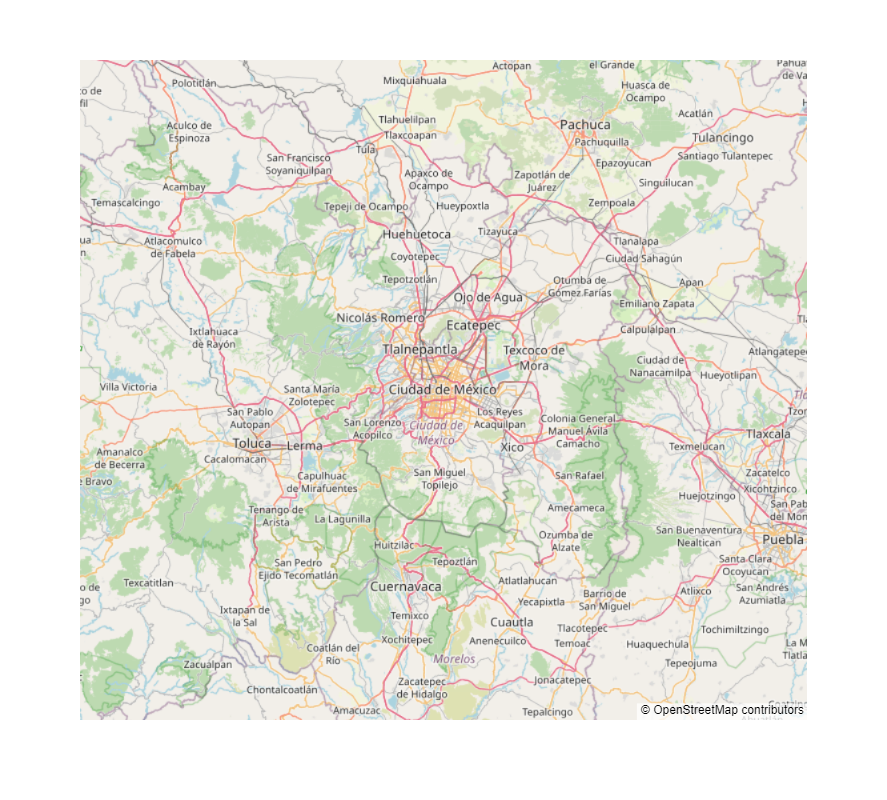

In [14]:
# Use plotly express to create figure
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=850,  # Width of map
    height=800,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

Looking at this map, are the houses in our dataset distributed evenly throughout the country, or are there states or regions that are more prevalent? Can you guess where Mexico's biggest cities are based on this distribution?

# Categorical Data: `"state"`

Even though we can get a good idea of which states are most common in our dataset from looking at a map, we can also get the exact count by using the `"state"` column. 

In [15]:
VimeoVideo("656353463", h="ee8bffd02b", width=600)

In [18]:
df["state"].unique()

array(['Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Rondônia', 'Santa Catarina', 'Sergipe',
       'São Paulo', 'Tocantins', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia',
       'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná',
       'Paraíba', 'Pará'], dtype=object)

In [20]:
df["state"].value_counts()

Minas Gerais           2680
São Paulo              2656
Rio Grande do Sul      2643
Rio de Janeiro         2642
Santa Catarina         2634
Paraná                 2544
Bahia                  2045
Ceará                  1574
Distrito Federal        732
Goiás                   555
Espírito Santo          555
Pernambuco              406
Rio Grande do Norte     302
Pará                    299
Paraíba                 250
Maranhão                101
Mato Grosso              86
Sergipe                  68
Piauí                    24
Alagoas                  24
Mato Grosso do Sul       14
Rondônia                  5
Amazonas                  3
Amapá                     1
Tocantins                 1
Name: state, dtype: int64

**Task 1.3.3:** Use the [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method on the `"state"` column to determine the 10 most prevalent states in our dataset.

- [What's categorical data?](../%40textbook/05-pandas-summary-statistics.ipynb#Categorical-Data)
- [What's a Series?](../%40textbook/05-pandas-summary-statistics.ipynb#Series)
- [Aggregate data in a Series using `value_counts` in pandas.](../%40textbook/04-pandas-advanced.ipynb#Combine-multiple-categories-in-a-Series) 

In [ ]:
# Get value counts of "state" column


# Numerical Data: `"area_m2"` and `"price_usd"`

We have a sense for where the houses in our dataset are located, but how much do they cost? How big are they? The best way to answer those questions is looking at descriptive statistics. 

In [21]:
VimeoVideo("656353149", h="2d5b273746", width=600)

**Task 1.3.4:** Use the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to print the mean, standard deviation, and quartiles for the `"area_m2"` and `"price_usd"` columns.

- [What's numerical data?](../%40textbook/05-pandas-summary-statistics.ipynb#Numerical-Data)
- [What's a mean?](../%40textbook/05-pandas-summary-statistics.ipynb#The-Mean)
- [What's a standard deviation?](../%40textbook/05-pandas-summary-statistics.ipynb#Standard-Deviation)
- [What are quartiles?](../%40textbook/05-pandas-summary-statistics.ipynb#Quartiles)
- [Print the summary statistics for a DataFrame using pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Working-with-Summary-Statistics)

In [22]:
# Describe "area_m2", "price_usd" columns
df[["area_m2","price_usd"]].describe()

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,109248.157493
std,47.742932,101360.734955
min,53.000000,12607.930000
25%,76.000000,30469.160000
50%,103.000000,78909.150000
75%,142.000000,154465.450000
max,252.000000,524246.390000


Let's start by looking at `"area_m2"`. It's interesting that the mean describerger than the median (another name for the 50% quartile). Both of these statistics are supposed to give an idea of the "typical" value for the column, so why is there a difference of almost 15 m<sup>2</sup> between them? To answer this question, we need to see how house sizes are distributed in our dataset. Let's look at two ways to visualize the distribution: a histogram and a boxplot.

In [23]:
VimeoVideo("656352616", h="6075fbacb5", width=600)

**Task 1.3.5:** Create a histogram of `"area_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"`, the y-axis has the label `"Frequency"`, and the plot has the title `"Distribution of Home Sizes"`. 

- [What's a histogram?](../%40textbook/06-visualization-matplotlib.ipynb#Histograms)
- [Create a histogram using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Histograms) 

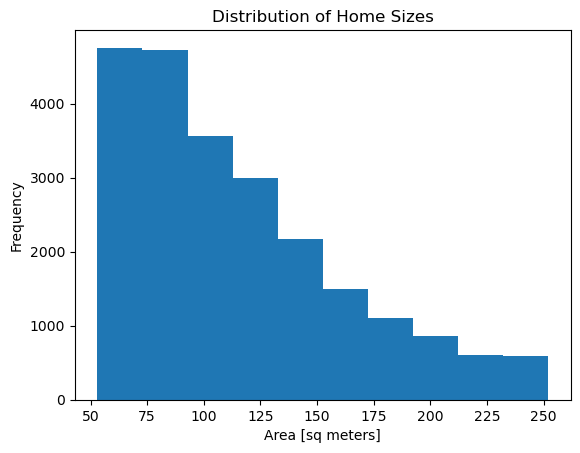

In [29]:
# Use Matplotlib to create histogram of "area_m2"
plt.hist(df["area_m2"])
# Add x-axis label
plt.xlabel("Area [sq meters]")
# Add y-axis label
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Home Sizes");

Looking at our histogram, we can see that `"area_m2"` skews right. In other words, there are more houses at the lower end of the distribution (50–200m<sup>2</sup>) than at the higher end (250–400m<sup>2</sup>). That explains the difference between the mean and the median.

In [30]:
VimeoVideo("656352166", h="5531b6e160", width=600)

**Task 1.3.6:** Create a horizontal boxplot of `"area_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"` and the plot has the title `"Distribution of Home Sizes"`. How is the distribution and its left skew represented differently here than in your histogram?

- [What's a boxplot?](../%40textbook/06-visualization-matplotlib.ipynb#Boxplots)
- [What's a skewed distribution?](../%40textbook/05-pandas-summary-statistics.ipynb#Skewed-Distributions)
- [Create a boxplot using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Boxplots)

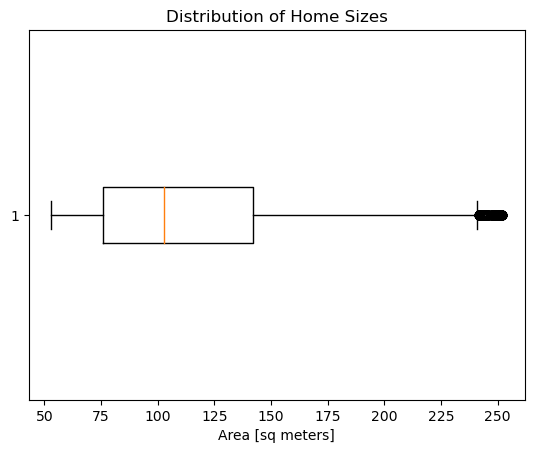

In [37]:
# Use Matplotlib to create boxplot of "area_m2"
plt.boxplot(df["area_m2"], vert= False)
# Add x-axis label
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes");

Does `"price_usd"` have the same distribution as `"price_per_m2"`? Let's use the same two visualization tools to find out.

In [38]:
VimeoVideo("656351977", h="a0868bd01e", width=600)

**Task 1.3.7:** Create a histogram of `"price_usd"`. Make sure that the x-axis has the label `"Price [USD]"`, the y-axis has the label `"Frequency"`, and the plot has the title `"Distribution of Home Prices"`. 

- [What's a histogram?](../%40textbook/06-visualization-matplotlib.ipynb#Histograms)
- [Create a histogram using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Histograms) 

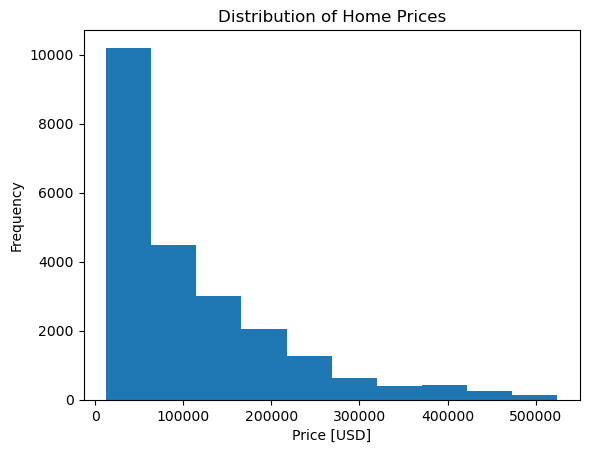

In [39]:
# Use Matplotlib to create histogram of "price_usd"
plt.hist(df["price_usd"])
# Add x-axis label
plt.xlabel("Price [USD]")
# Add y-axis label
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Home Prices");

Looks like `"price_usd"` is even more skewed than `"area_m2"`. What does this bigger skew look like in a boxplot?

In [40]:
VimeoVideo("656351234", h="44ca8af7ac", width=600)

**Task 1.3.8:** Create a horizontal boxplot of `"price_usd"`. Make sure that the x-axis has the label `"Price [USD]"` and the plot has the title `"Distribution of Home Prices"`.

- [What's a boxplot?](../%40textbook/06-visualization-matplotlib.ipynb#Boxplots)
- [What's an outlier?](../%40textbook/05-pandas-summary-statistics.ipynb#Outliers)
- [Create a boxplot using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Boxplots)

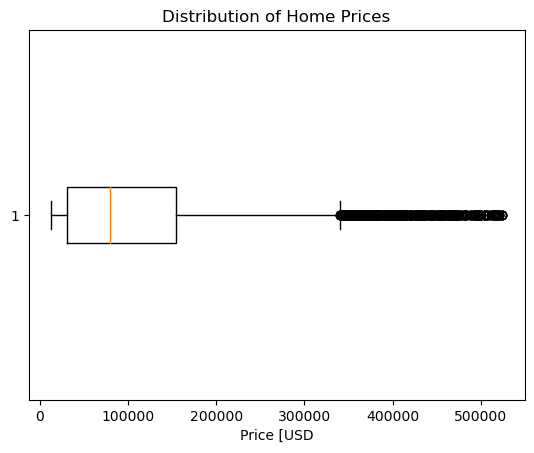

In [44]:
# Use Matplotlib to create boxplot of "price_usd"
plt.boxplot(df["price_usd"], vert=False)
# Add x-label axis
plt.xlabel("Price [USD")
# Add y-label axis
plt.title("Distribution of Home Prices");

Excellent job! Now that you have a sense of for the dataset, let's move to the next notebook and start answering some research questions about the relationship between house size, price, and location.

---
Copyright 2023 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
